In [39]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
from PIL import Image

def resize_image(image_path, output_size=(200, 200)):
    """
    Resizes the image at the given path to the specified output size while maintaining aspect ratio.
    
    Parameters:
    image_path (str): The path to the image file.
    output_size (tuple): The desired output size as a tuple (width, height).
    
    Returns:
    Image: The resized image.
    """
    if os.path.exists(image_path):
        with Image.open(image_path) as img:
            img = img.convert("RGBA")  # Ensure the image is in RGBA mode to preserve transparency
            original_width, original_height = img.size
            aspect_ratio = original_width / original_height
            
            # Calculate new size while maintaining aspect ratio
            if original_width > original_height:
                new_width = output_size[0]
                new_height = int(new_width / aspect_ratio)
            else:
                new_height = output_size[1]
                new_width = int(new_height * aspect_ratio)
            
            resized_img = img.resize((new_width, new_height), Image.LANCZOS)
            return resized_img
    else:
        print(f"{image_path} does not exist")
        return None


In [41]:

def draw_bracket(ax, x_start, y_start, round_spacing, match_spacing, num_teams, seeds, matchups, depth=0):
    """ Draws a single side of the bracket with adjustable team levels and shape-based logos. """
    new_teams = []
    logo_zoom = 0.25  # Adjust zoom based on the number of teams
    fixed_size = (200, 200)  # Fixed size for all logos
    
    for i, (seed1, seed2) in enumerate(matchups):
        y1 = y_start + i * 2 * match_spacing
        y2 = y1 + match_spacing
        x_mid = x_start + round_spacing
        
        # Draw horizontal lines for the match
        ax.plot([x_start, x_mid], [y1, y1], 'k', linewidth=5)
        ax.plot([x_start, x_mid], [y2, y2], 'k', linewidth=5)
        
        # Draw vertical line connecting the match
        ax.plot([x_mid, x_mid], [y1, y2], 'k', linewidth=5)
        
        team1 = seeds[seed1]
        team2 = seeds[seed2]
        
        ax.text(x_start + 0.05, y1 + 0.1, f'{seed1}. {team1}', ha='left', fontsize=15, fontweight='bold', color='darkblue')
        ax.text(x_start + 0.05, y2 + 0.1, f'{seed2}. {team2}', ha='left', fontsize=15, fontweight='bold', color='darkblue')
        
        # Load and resize team logos
        logo1_path = os.path.join('Summit League Logos', f'{team1}.png')
        logo2_path = os.path.join('Summit League Logos', f'{team2}.png')
        
        if os.path.exists(logo1_path):
            logo1 = resize_image(logo1_path, output_size=fixed_size)
            if logo1:
                logo1 = np.array(logo1)
                imagebox1 = OffsetImage(logo1, zoom=logo_zoom)
                ab1 = AnnotationBbox(imagebox1, (x_start - 0.3, y1), frameon=False)
                ax.add_artist(ab1)
        else:
            print(logo1_path, "does not exist")
        
        if os.path.exists(logo2_path):
            logo2 = resize_image(logo2_path, output_size=fixed_size)
            if logo2:
                logo2 = np.array(logo2)
                imagebox2 = OffsetImage(logo2, zoom=logo_zoom)
                ab2 = AnnotationBbox(imagebox2, (x_start - 0.3, y2), frameon=False)
                ax.add_artist(ab2)
        
        # Flip a coin for winning team
        if np.random.rand() > 0.5:
            new_teams.append(seed1)
        else:
            new_teams.append(seed2)
    
    if num_teams > 2:
        next_matchups = [(new_teams[i], new_teams[i + 1]) for i in range(0, len(new_teams), 2)]
        draw_bracket(ax, x_mid, y_start + match_spacing /2, round_spacing, match_spacing * 2, num_teams // 2, seeds, next_matchups, depth + 1)
    else:
        # Final matchup to determine the champion
        champion_seed = new_teams[0]
        champion_team = seeds[champion_seed]
        ax.text(x_mid+1, y_start + match_spacing / 2 + 0.75, f'CHAMPION:\n {champion_team}', ha='center', fontsize=20, fontweight='bold', color='darkred', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        champlogo_path = os.path.join('Summit League Logos', f'{champion_team}.png')
        if os.path.exists(champlogo_path):
            champlogo = resize_image(champlogo_path, output_size=fixed_size)
            if champlogo:
                champlogo = np.array(champlogo)
                champimagebox = OffsetImage(champlogo, zoom=logo_zoom*2)
                abchamp = AnnotationBbox(champimagebox, (x_mid+1, y_start+match_spacing/2), frameon=False)
                ax.add_artist(abchamp)
        
        # Draw line for the champion
        ax.plot([x_mid, x_mid + 1], [y_start + match_spacing / 2, y_start + match_spacing / 2], 'k', linewidth=5)

def plot_ncaa_bracket(num_teams=8, seeds=None, matchups=None):
    if num_teams & (num_teams - 1) != 0:
        raise ValueError("Number of teams must be a power of 2 (e.g., 4, 8, 16, 32, etc.)")
    
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.set_xlim(0, np.log2(num_teams) * 3)
    ax.set_ylim(0, num_teams)
    ax.axis('off')
    ax.set_facecolor("#f5f5f5")
    
    round_spacing = 2.0
    match_spacing = 1.0
    
    draw_bracket(ax, 1, 0.5, round_spacing, match_spacing, num_teams, seeds, matchups)
    
    plt.show()


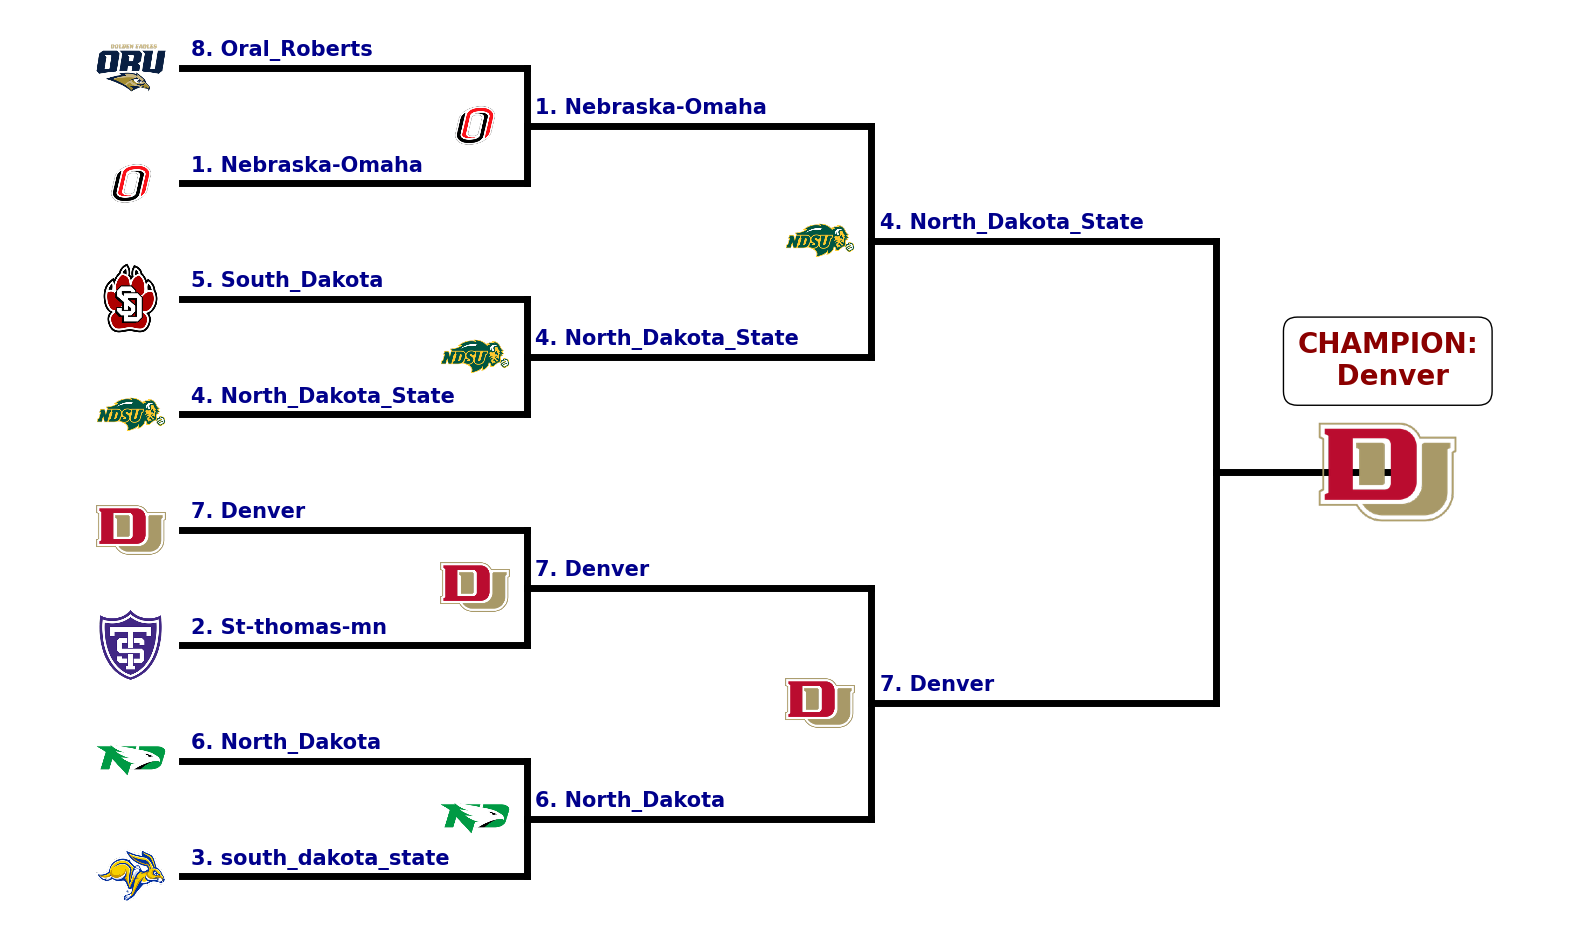

In [42]:

# Dictionary of seeds with teams
seeds = {
    7: 'Denver',
    1: 'Nebraska-Omaha',
    4: 'North_Dakota_State',
    8: 'Oral_Roberts',
    5: 'South_Dakota',
    3: 'south_dakota_state',
    2: 'St-thomas-mn',
    6: 'North_Dakota'
}

# List of matchups in classic tournament format
matchups = [
    (3, 6),
    (2, 7),
    (4, 5),
    (1, 8)
]

# Example usage
plot_ncaa_bracket(num_teams=len(seeds), seeds=seeds, matchups=matchups)

### Now lets try to add in the first round

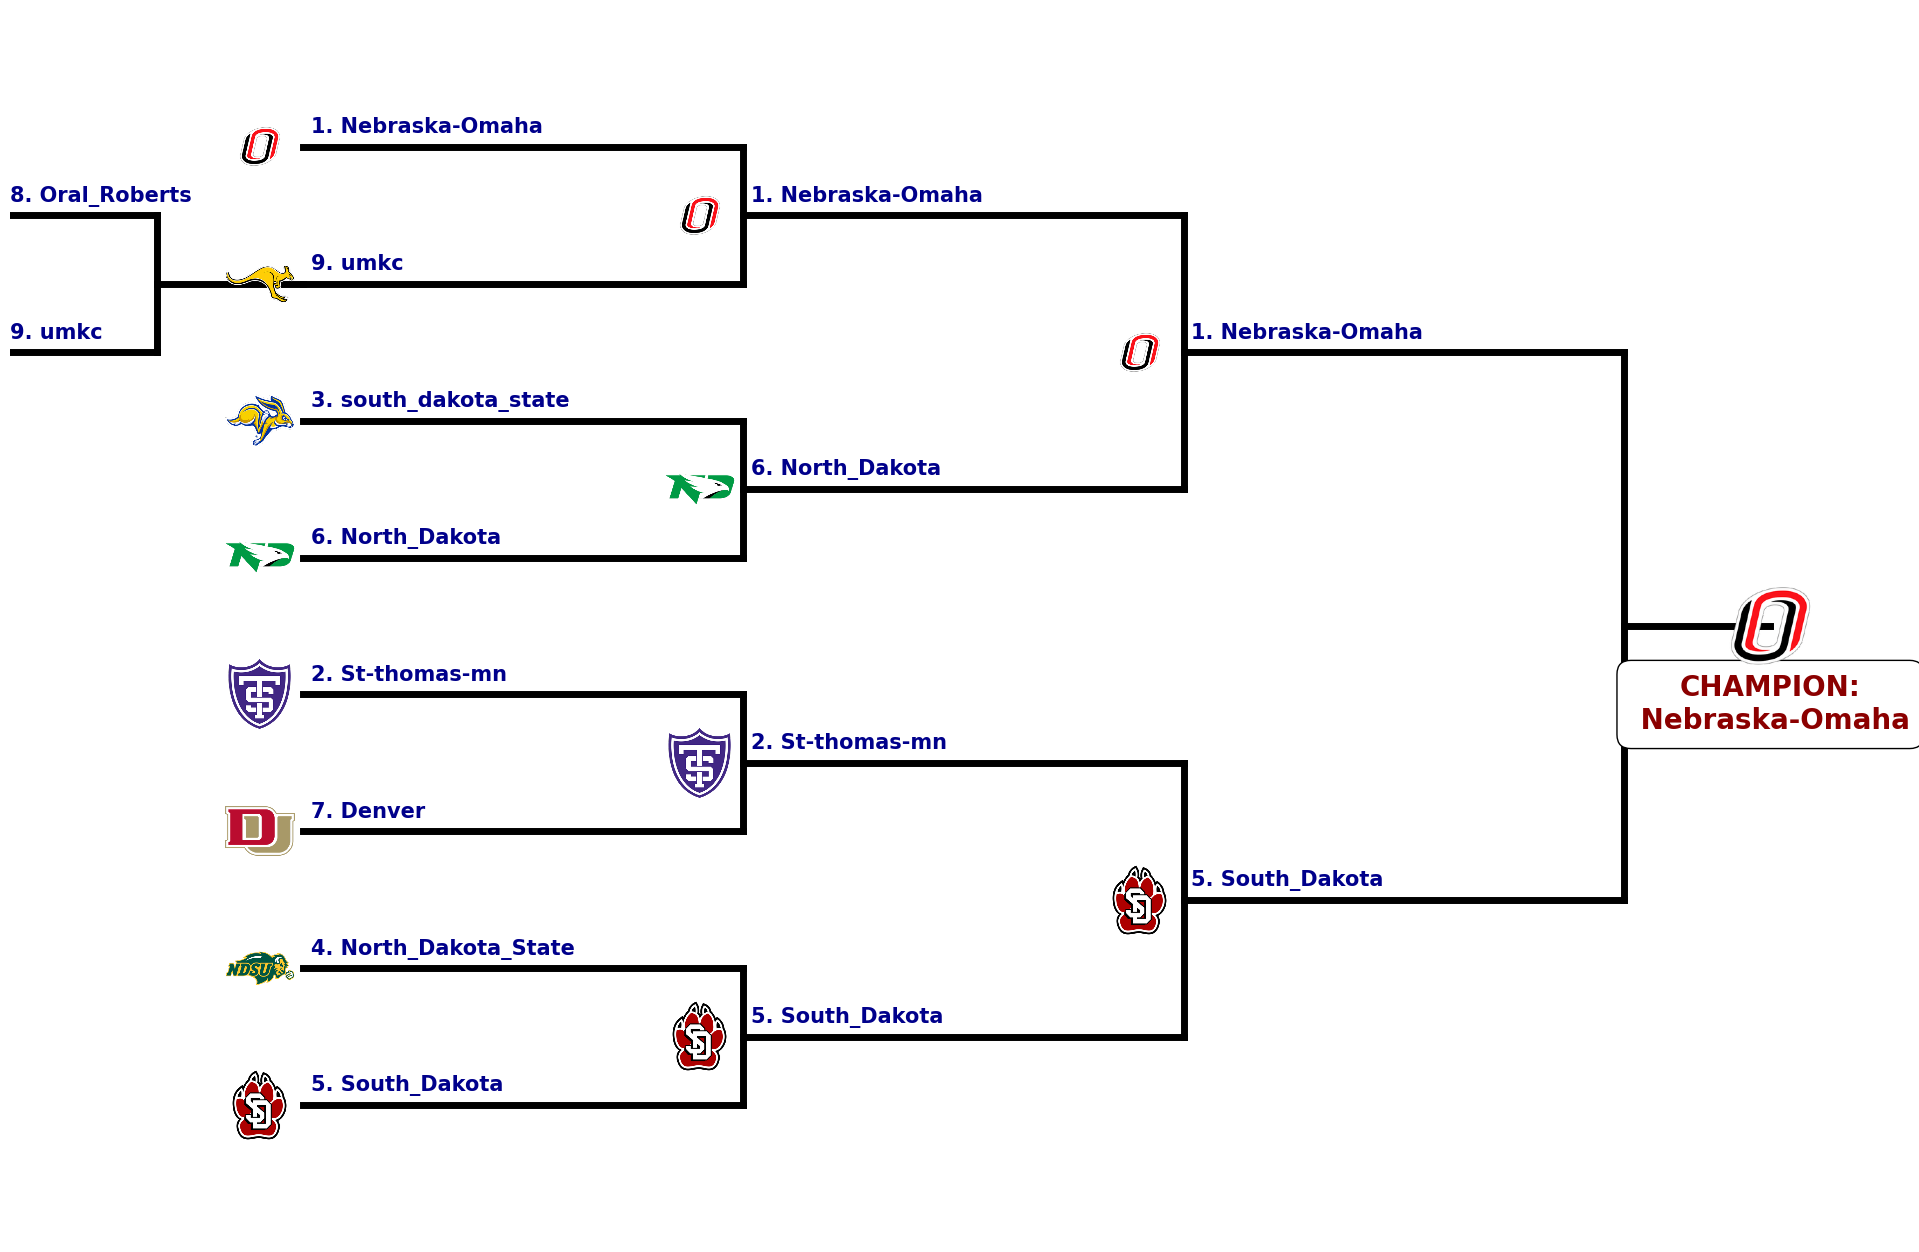

In [ ]:

def resize_image(image_path, output_size=(200, 200)):
    """
    Resizes the image at the given path to the specified output size while maintaining aspect ratio.
    
    Parameters:
    image_path (str): The path to the image file.
    output_size (tuple): The desired output size as a tuple (width, height).
    
    Returns:
    Image: The resized image.
    """
    if os.path.exists(image_path):
        with Image.open(image_path) as img:
            img = img.convert("RGBA")  # Ensure the image is in RGBA mode to preserve transparency
            original_width, original_height = img.size
            aspect_ratio = original_width / original_height
            
            # Calculate new size while maintaining aspect ratio
            if original_width > original_height:
                new_width = output_size[0]
                new_height = int(new_width / aspect_ratio)
            else:
                new_height = output_size[1]
                new_width = int(new_height * aspect_ratio)
            
            resized_img = img.resize((new_width, new_height), Image.LANCZOS)
            return resized_img
    else:
        print(f"{image_path} does not exist")
        return None


def draw_bracket(ax, x_start, y_start, round_spacing, match_spacing, num_teams, seeds, matchups, depth=0):
    """ Draws a single side of the bracket with adjustable team levels and shape-based logos. """
    new_teams = []
    logo_zoom = 0.25  # Adjust zoom based on the number of teams
    fixed_size = (200, 200)  # Fixed size for all logos
    
    for i, (seed1, seed2) in enumerate(matchups):
        y1 = y_start - i * 2 * match_spacing
        y2 = y1 - match_spacing
        x_mid = x_start + round_spacing
        
        # Draw horizontal lines for the match
        ax.plot([x_start, x_mid], [y1, y1], 'k', linewidth=5)
        ax.plot([x_start, x_mid], [y2, y2], 'k', linewidth=5)
        
        # Draw vertical line connecting the match
        ax.plot([x_mid, x_mid], [y1, y2], 'k', linewidth=5)
        
        team1 = seeds[seed1]
        team2 = seeds[seed2]
        
        ax.text(x_start + 0.05, y1 + 0.1, f'{seed1}. {team1}', ha='left', fontsize=15, fontweight='bold', color='darkblue')
        ax.text(x_start + 0.05, y2 + 0.1, f'{seed2}. {team2}', ha='left', fontsize=15, fontweight='bold', color='darkblue')
        
        # Load and resize team logos
        logo1_path = os.path.join('Summit League Logos', f'{team1}.png')
        logo2_path = os.path.join('Summit League Logos', f'{team2}.png')
        
        if os.path.exists(logo1_path):
            logo1 = resize_image(logo1_path, output_size=fixed_size)
            if logo1:
                logo1 = np.array(logo1)
                imagebox1 = OffsetImage(logo1, zoom=logo_zoom)
                ab1 = AnnotationBbox(imagebox1, (x_start - 0.3, y1), frameon=False)
                ax.add_artist(ab1)
        else:
            print(logo1_path, "does not exist")
        
        if os.path.exists(logo2_path):
            logo2 = resize_image(logo2_path, output_size=fixed_size)
            if logo2:
                logo2 = np.array(logo2)
                imagebox2 = OffsetImage(logo2, zoom=logo_zoom)
                ab2 = AnnotationBbox(imagebox2, (x_start - 0.3, y2), frameon=False)
                ax.add_artist(ab2)
        
        # Flip a coin for winning team
        if np.random.rand() > 0.5:
            new_teams.append(seed1)
        else:
            new_teams.append(seed2)
    
    if num_teams > 2:
        next_matchups = [(new_teams[i], new_teams[i + 1]) for i in range(0, len(new_teams), 2)]
        draw_bracket(ax, x_mid, y_start - match_spacing / 2, round_spacing, match_spacing * 2, num_teams // 2, seeds, next_matchups, depth + 1)
    else:
        # Final matchup to determine the champion
        champion_seed = new_teams[0]
        champion_team = seeds[champion_seed]
        ax.text(x_mid + 1, y_start - match_spacing / 2 - 0.75, f'CHAMPION:\n {champion_team}', ha='center', fontsize=20, fontweight='bold', color='darkred', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        champlogo_path = os.path.join('Summit League Logos', f'{champion_team}.png')
        if os.path.exists(champlogo_path):
            champlogo = resize_image(champlogo_path, output_size=fixed_size)
            if champlogo:
                champlogo = np.array(champlogo)
                champimagebox = OffsetImage(champlogo, zoom=logo_zoom * 2)
                abchamp = AnnotationBbox(champimagebox, (x_mid + 1, y_start - match_spacing / 2), frameon=False)
                ax.add_artist(abchamp)
        
        # Draw line for the champion
        ax.plot([x_mid, x_mid + 1], [y_start - match_spacing / 2, y_start - match_spacing / 2], 'k', linewidth=5)


def plot_ncaa_bracket(num_teams=8, seeds=None, matchups=None, prelim_matchup=None):
    fig, ax = plt.subplots(figsize=(24, 16))  # Increase the size of the figure
    ax.set_xlim(0, np.log2(num_teams + 1) * 4)  # Increase the x-axis limit to add more space
    ax.set_ylim(-num_teams, 1)
    ax.axis('off')
    ax.set_facecolor("#f5f5f5")
    
    round_spacing = 3.0  # Increase the round spacing
    match_spacing = 1.0
    
    # Draw preliminary matchup
    if prelim_matchup:
        prelim_winner = prelim_matchup[0] if np.random.rand() > 0.5 else prelim_matchup[1]
        seeds[9] = seeds[prelim_winner]
        ax.text(0, -0.4, f'{prelim_matchup[0]}. {seeds[prelim_matchup[0]]}', ha='left', fontsize=15, fontweight='bold', color='darkblue')
        ax.text(0, -1.4, f'{prelim_matchup[1]}. {seeds[prelim_matchup[1]]}', ha='left', fontsize=15, fontweight='bold', color='darkblue')
        #Top horizontal line
        ax.plot([0, 1], [-0.5, -0.5], 'k', linewidth=5)
        #bottom horizontal line
        ax.plot([0, 1], [-1.5, -1.5], 'k', linewidth=5)
        #vertical line to connect matchup
        ax.plot([1, 1], [-0.5, -1.5], 'k', linewidth=5)
        
        ax.plot([1, 2], [-1, -1], 'k', linewidth=5)  # Connect to the main bracket

        #ax.text(1.1, -0.5, f'Winner: {seeds[prelim_winner]}', ha='left', fontsize=15, fontweight='bold', color='darkblue')
        matchups = [(1, prelim_winner)] + matchups
    
    draw_bracket(ax, 2, 0, round_spacing, match_spacing, num_teams, seeds, matchups)  # Adjust the x_start to add more space
    
    plt.show()



# Dictionary of seeds with teams
seeds = {
    7: 'Denver',
    1: 'Nebraska-Omaha',
    4: 'North_Dakota_State',
    8: 'Oral_Roberts',
    5: 'South_Dakota',
    3: 'south_dakota_state',
    2: 'St-thomas-mn',
    6: 'North_Dakota',
    9: 'umkc'
}

# List of matchups in classic tournament format
matchups = [
    (3, 6),
    (2, 7),
    (4, 5)
]

# Preliminary matchup
prelim_matchup = (8, 9)

# Example usage
plot_ncaa_bracket(num_teams=8, seeds=seeds, matchups=matchups, prelim_matchup=prelim_matchup)

### Now the names are annoying to deal with, lets just use logos

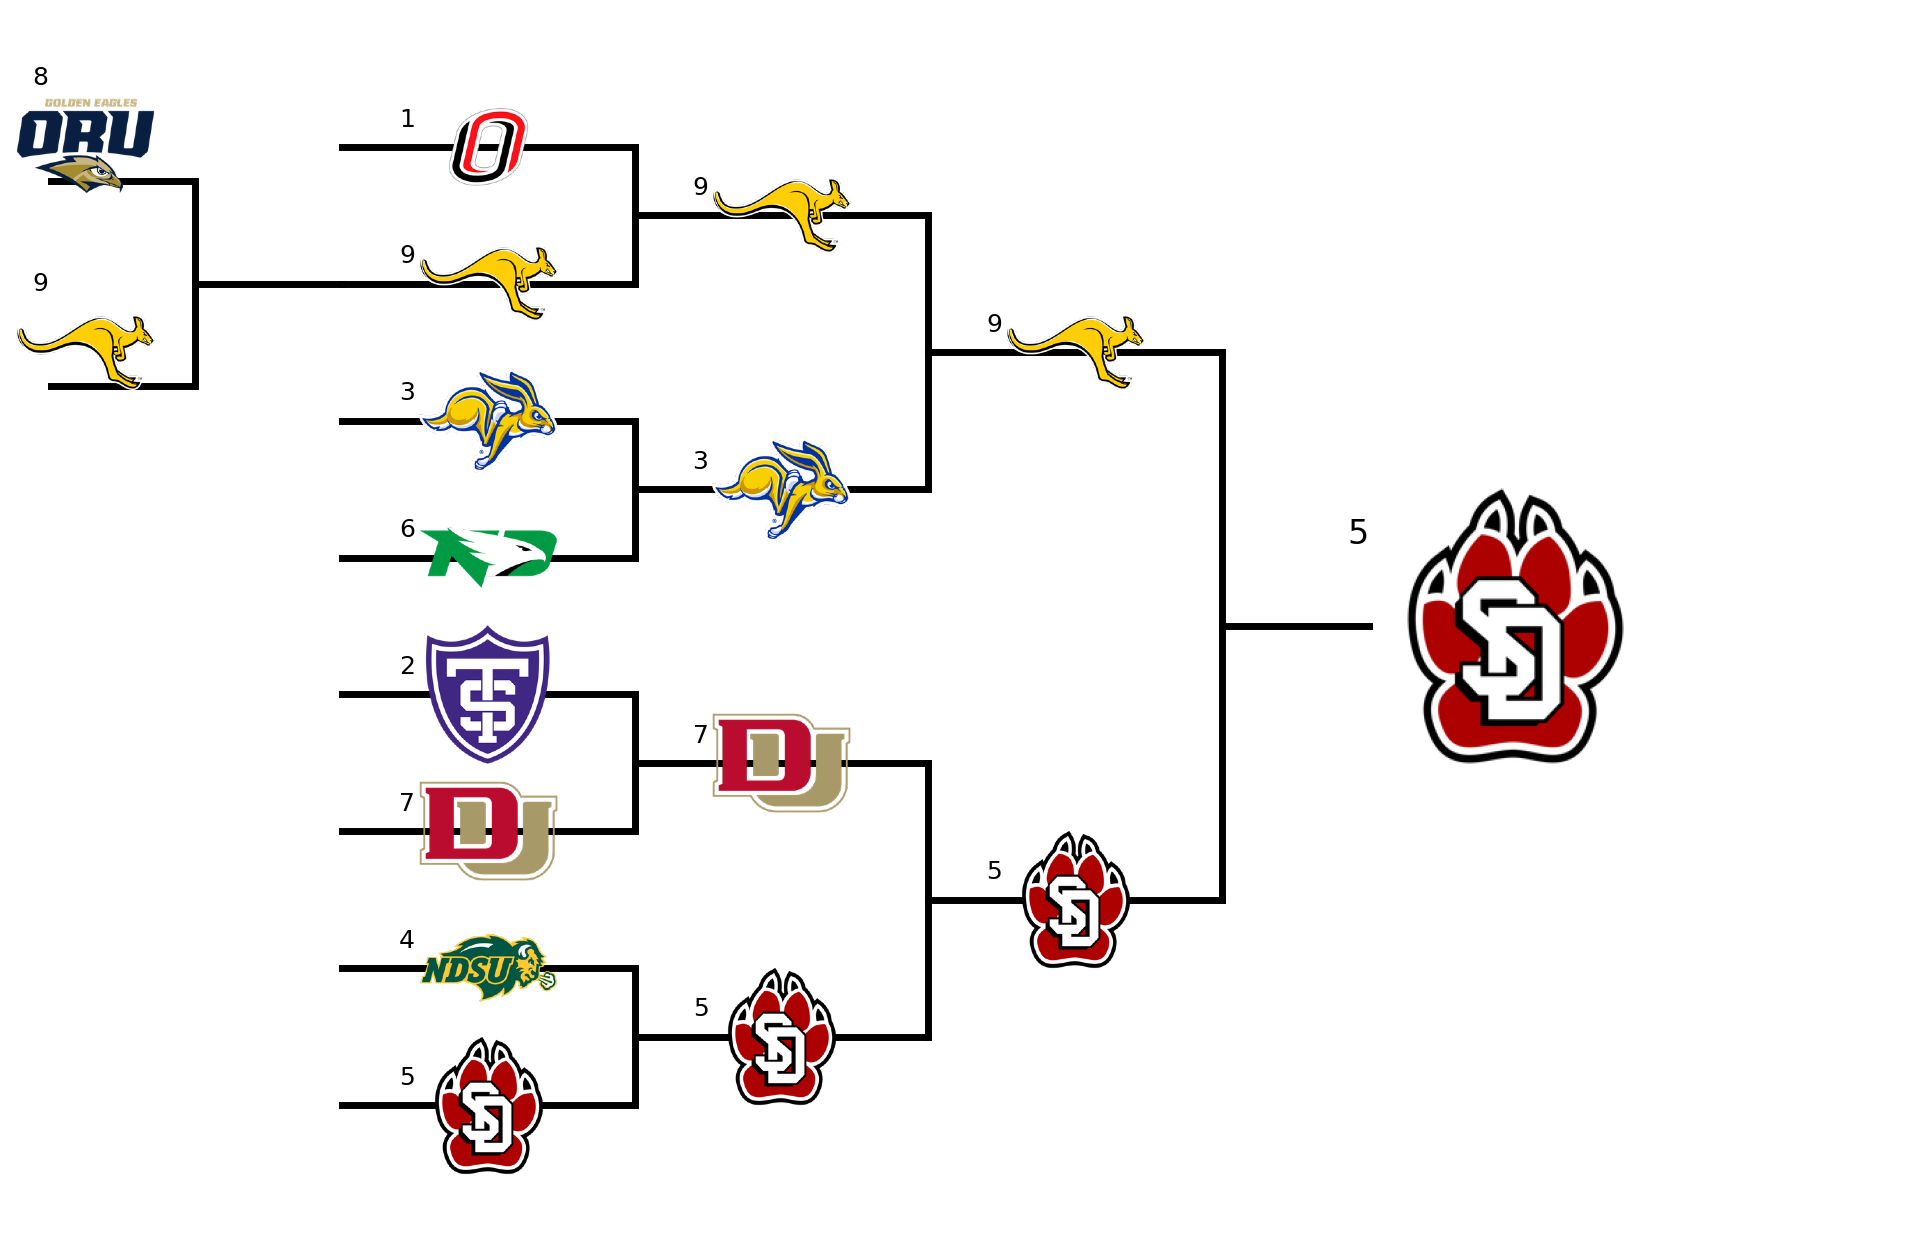

In [79]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

def resize_image(image_path, output_size=(200, 200)):
    """
    Resizes the image at the given path to the specified output size while maintaining aspect ratio.
    
    Parameters:
    image_path (str): The path to the image file.
    output_size (tuple): The desired output size as a tuple (width, height).
    
    Returns:
    Image: The resized image.
    """
    if os.path.exists(image_path):
        with Image.open(image_path) as img:
            img = img.convert("RGBA")  # Ensure the image is in RGBA mode to preserve transparency
            original_width, original_height = img.size
            aspect_ratio = original_width / original_height
            
            # Calculate new size while maintaining aspect ratio
            if original_width > original_height:
                new_width = output_size[0]
                new_height = int(new_width / aspect_ratio)
            else:
                new_height = output_size[1]
                new_width = int(new_height * aspect_ratio)
            
            resized_img = img.resize((new_width, new_height), Image.LANCZOS)
            return resized_img
    else:
        print(f"{image_path} does not exist")
        return None


def draw_bracket(ax, x_start, y_start, round_spacing, match_spacing, num_teams, seeds, matchups, logo_zoom=0.25, depth=0):
    """ Draws a single side of the bracket with adjustable team levels and shape-based logos. """
    new_teams = []
    fixed_size = (200, 200)  # Fixed size for all logos
    
    for i, (seed1, seed2) in enumerate(matchups):
        y1 = y_start - i * 2 * match_spacing
        y2 = y1 - match_spacing
        x_mid = x_start + round_spacing
        
        # Draw horizontal lines for the match
        ax.plot([x_start, x_mid], [y1, y1], 'k', linewidth=5)
        ax.plot([x_start, x_mid], [y2, y2], 'k', linewidth=5)
        
        # Draw vertical line connecting the match
        ax.plot([x_mid, x_mid], [y1, y2], 'k', linewidth=5)
        
        team1 = seeds[seed1]
        team2 = seeds[seed2]
        
        # Load and resize team logos
        logo1_path = os.path.join('Summit League Logos', f'{team1}.png')
        logo2_path = os.path.join('Summit League Logos', f'{team2}.png')
        
        if os.path.exists(logo1_path):
            logo1 = resize_image(logo1_path, output_size=fixed_size)
            if logo1:
                logo1 = np.array(logo1)
                imagebox1 = OffsetImage(logo1, zoom=logo_zoom)
                ab1 = AnnotationBbox(imagebox1, (x_start +round_spacing/2 , y1), frameon=False)
                ax.add_artist(ab1)
                ax.text(x_start + round_spacing/4, y1+0.2, str(seed1), fontsize=18, ha='right', va='center')
        else:
            print(logo1_path, "does not exist")
        
        if os.path.exists(logo2_path):
            logo2 = resize_image(logo2_path, output_size=fixed_size)
            if logo2:
                logo2 = np.array(logo2)
                imagebox2 = OffsetImage(logo2, zoom=logo_zoom)
                ab2 = AnnotationBbox(imagebox2, (x_start +round_spacing/2, y2), frameon=False)
                ax.add_artist(ab2)
                ax.text(x_start + round_spacing/4, y2+0.2, str(seed2), fontsize=18, ha='right', va='center')
        
        # Flip a coin for winning team
        if np.random.rand() > 0.5:
            new_teams.append(seed1)
        else:
            new_teams.append(seed2)
    
    if num_teams > 2:
        next_matchups = [(new_teams[i], new_teams[i + 1]) for i in range(0, len(new_teams), 2)]
        draw_bracket(ax, x_mid, y_start - match_spacing / 2, round_spacing, match_spacing * 2, num_teams // 2, seeds, next_matchups, logo_zoom, depth + 1)
    else:
        # Final matchup to determine the champion
        champion_seed = new_teams[0]
        champion_team = seeds[champion_seed]
        
        champlogo_path = os.path.join('Summit League Logos', f'{champion_team}.png')
        if os.path.exists(champlogo_path):
            champlogo = resize_image(champlogo_path, output_size=fixed_size)
            if champlogo:
                champlogo = np.array(champlogo)
                champimagebox = OffsetImage(champlogo, zoom=logo_zoom * 2)
                abchamp = AnnotationBbox(champimagebox, (x_mid + round_spacing, y_start - match_spacing / 2), frameon=False)
                ax.add_artist(abchamp)
                ax.text(x_mid + round_spacing/2, y_start - match_spacing / 3, str(champion_seed), fontsize=24, ha='right', va='center')
        
        # Draw line for the champion
        ax.plot([x_mid, x_mid + 1], [y_start - match_spacing / 2, y_start - match_spacing / 2], 'k', linewidth=5)


def plot_ncaa_bracket(num_teams=8, seeds=None, matchups=None, prelim_matchup=None, logo_zoom=0.25):
    fig, ax = plt.subplots(figsize=(24, 16))  # Increase the size of the figure
    ax.set_xlim(0, np.log2(num_teams + 1) * 4)  # Increase the x-axis limit to add more space
    ax.set_ylim(-num_teams, 1)
    ax.axis('off')
    ax.set_facecolor("#f5f5f5")
    
    round_spacing = 2.0  # Increase the round spacing
    match_spacing = 1.0
    
    # Draw preliminary matchup
    if prelim_matchup:
        prelim_winner = prelim_matchup[0] if np.random.rand() > 0.5 else prelim_matchup[1]
        seeds[9] = seeds[prelim_winner]
        
        # Load and resize preliminary matchup logos
        prelim_logo1_path = os.path.join('Summit League Logos', f'{seeds[prelim_matchup[0]]}.png')
        prelim_logo2_path = os.path.join('Summit League Logos', f'{seeds[prelim_matchup[1]]}.png')
        
        if os.path.exists(prelim_logo1_path):
            prelim_logo1 = resize_image(prelim_logo1_path, output_size=(200, 200))
            if prelim_logo1:
                prelim_logo1 = np.array(prelim_logo1)
                prelim_imagebox1 = OffsetImage(prelim_logo1, zoom=logo_zoom)
                ab_prelim1 = AnnotationBbox(prelim_imagebox1, (0.25, 0), frameon=False)
                ax.add_artist(ab_prelim1)
                ax.text(0, 0.5, str(prelim_matchup[0]), fontsize=18, ha='right', va='center')
        else:
            print(prelim_logo1_path, "does not exist")
        
        if os.path.exists(prelim_logo2_path):
            prelim_logo2 = resize_image(prelim_logo2_path, output_size=(200, 200))
            if prelim_logo2:
                prelim_logo2 = np.array(prelim_logo2)
                prelim_imagebox2 = OffsetImage(prelim_logo2, zoom=logo_zoom)
                ab_prelim2 = AnnotationBbox(prelim_imagebox2, (0.25, -1.5), frameon=False)
                ax.add_artist(ab_prelim2)
                ax.text(0, -1, str(prelim_matchup[1]), fontsize=18, ha='right', va='center')
        
        # Top horizontal line
        ax.plot([0, 1], [-0.25, -0.25], 'k', linewidth=5)
        # Bottom horizontal line
        ax.plot([0, 1], [-1.75, -1.75], 'k', linewidth=5)
        # Vertical line to connect matchup
        ax.plot([1, 1], [-0.25,-1.75], 'k', linewidth=5)
        
        ax.plot([1, 2], [-1, -1], 'k', linewidth=5)  # Connect to the main bracket

        matchups = [(1, prelim_winner)] + matchups
    
    draw_bracket(ax, 2, 0, round_spacing, match_spacing, num_teams, seeds, matchups, logo_zoom)  # Adjust the x_start to add more space
    
    plt.show()


# Dictionary of seeds with teams
seeds = {
    7: 'Denver',
    1: 'Nebraska-Omaha',
    4: 'North_Dakota_State',
    8: 'Oral_Roberts',
    5: 'South_Dakota',
    3: 'south_dakota_state',
    2: 'St-thomas-mn',
    6: 'North_Dakota',
    9: 'umkc'
}

# List of matchups in classic tournament format
matchups = [
    (3, 6),
    (2, 7),
    (4, 5)
]

# Preliminary matchup
prelim_matchup = (8, 9)

# Example usage
plot_ncaa_bracket(num_teams=8, seeds=seeds, matchups=matchups, prelim_matchup=prelim_matchup, logo_zoom=0.5)